C:\Users\PC\AppData\Local\Temp\ipykernel_5988\1319678049.py:24: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["DOB"] = pd.to_datetime(data["DOB"], errors="coerce")


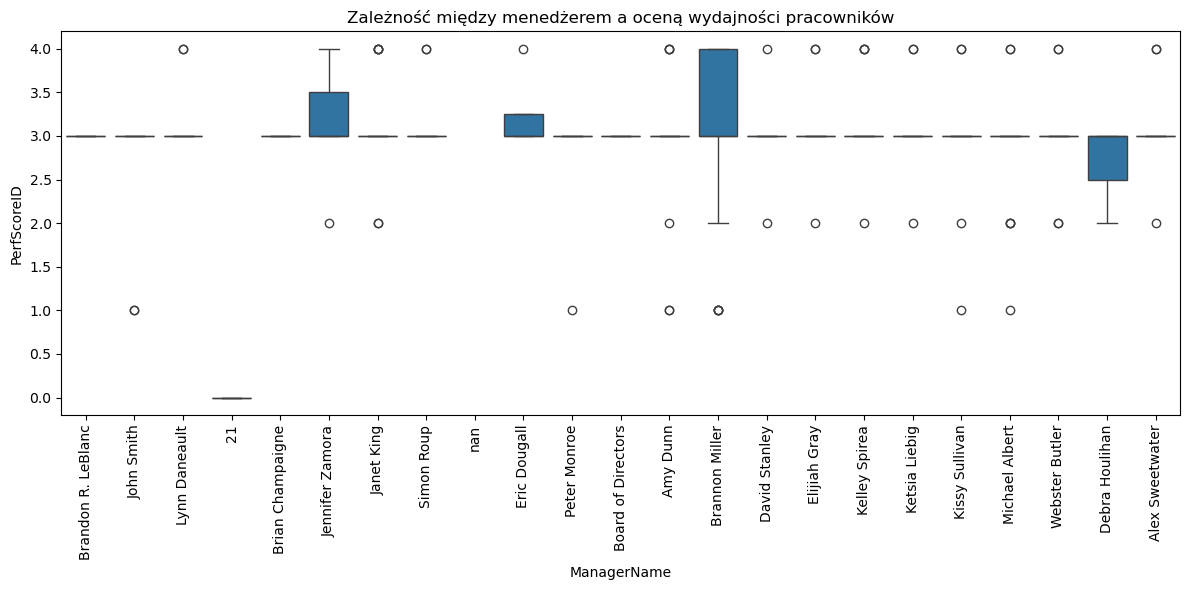

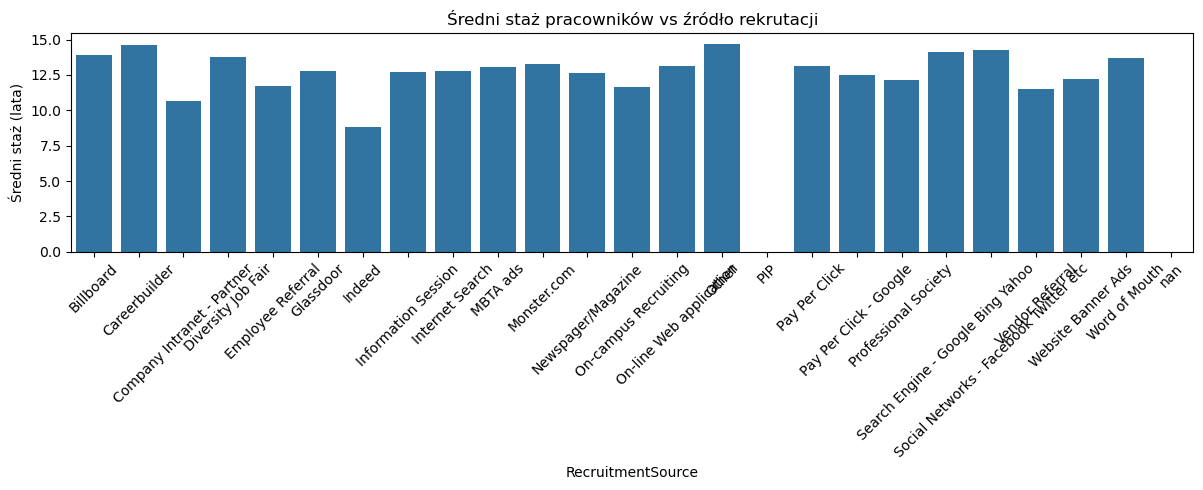

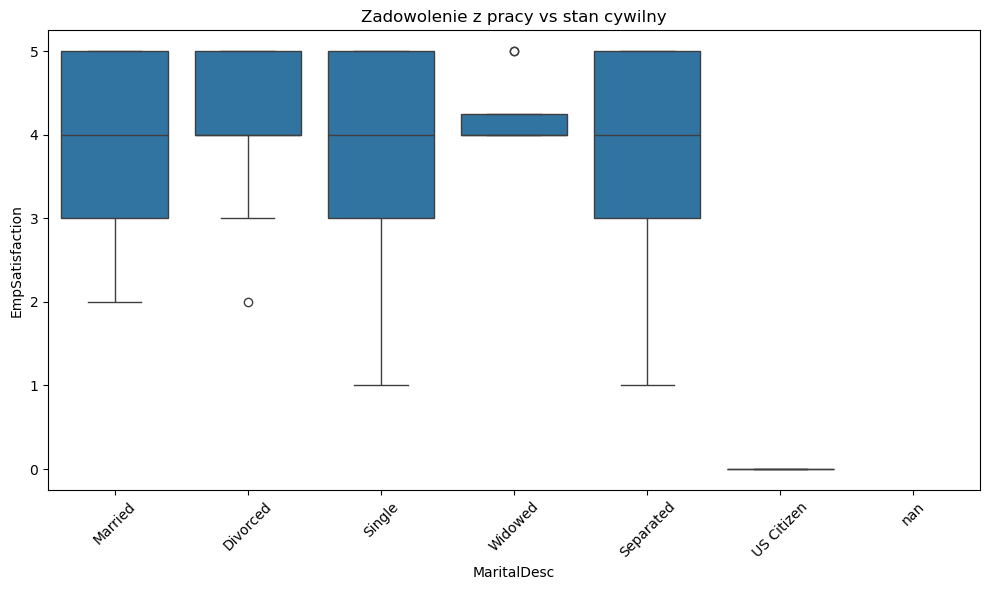

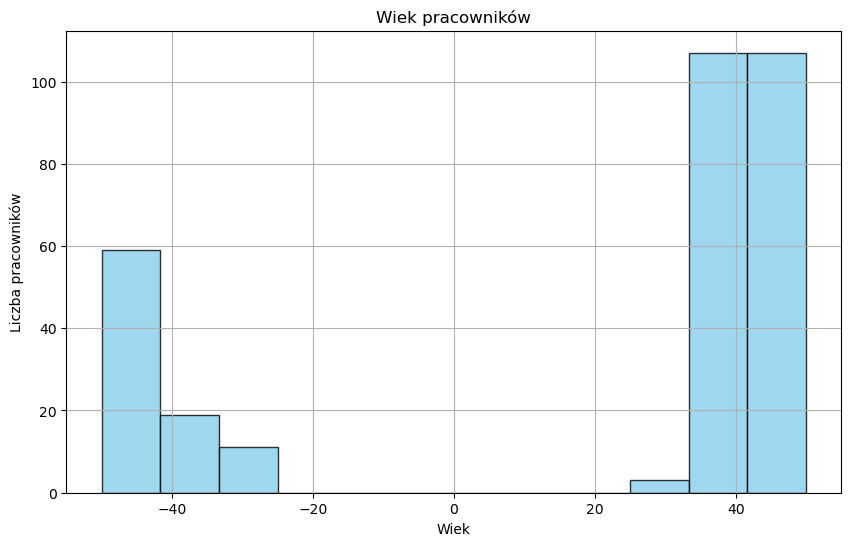

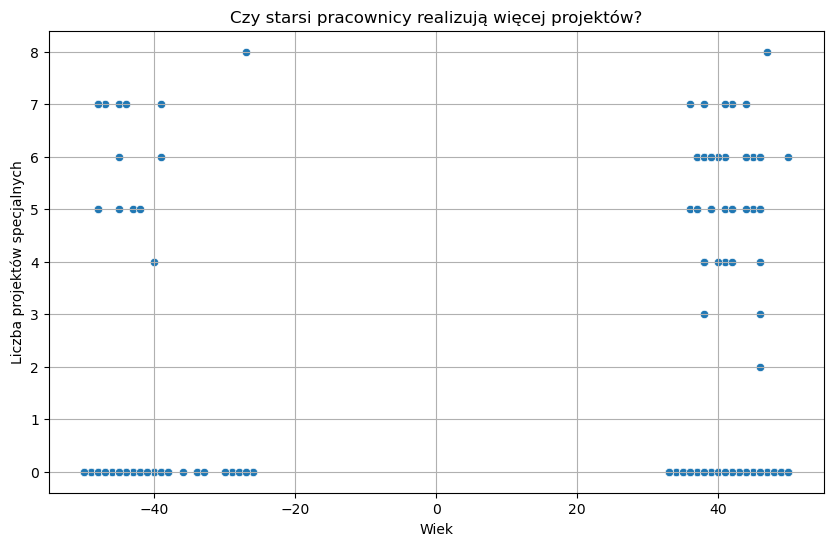

Macierz korelacji:
                            Age  SpecialProjectsCount
Age                   1.000000              0.033927
SpecialProjectsCount  0.033927              1.000000


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# 1. Wczytanie i czyszczenie danych
# -----------------------------

data = pd.read_csv("HRDataset (2).csv")

# Usunięcie duplikatów kolumn i reset index
data = data.loc[:, ~data.columns.duplicated()]
data = data.reset_index(drop=True)

# Poprawienie białych znaków w kolumnach tekstowych
for col in data.select_dtypes(include="object").columns:
    data[col] = data[col].astype(str).str.strip()

# -----------------------------
# 2. Tworzenie kolumn Age i TenureYears
# -----------------------------

# Data of Birth
data["DOB"] = pd.to_datetime(data["DOB"], errors="coerce")
data["Age"] = pd.to_numeric((pd.Timestamp.today() - data["DOB"]).dt.days // 365, errors="coerce")

# Data of Hire → staż
data["DateofHire"] = pd.to_datetime(data["DateofHire"], errors="coerce")
data["TenureYears"] = pd.to_numeric((pd.Timestamp.today() - data["DateofHire"]).dt.days / 365.25, errors="coerce")

# -----------------------------
# 3. Wykres: wydajność vs menedżer
# -----------------------------

plt.figure(figsize=(12,6))
sns.boxplot(x="ManagerName", y="PerfScoreID", data=data)
plt.xticks(rotation=90)
plt.title("Zależność między menedżerem a oceną wydajności pracowników")
plt.tight_layout()
plt.show()

# -----------------------------
# 4. Średni staż vs źródło rekrutacji
# -----------------------------

# Usunięcie nadmiarowych spacji w źródłach rekrutacji
data["RecruitmentSource"] = data["RecruitmentSource"].str.strip()

mean_tenure = (
    data.groupby("RecruitmentSource", as_index=False)["TenureYears"].mean()
)

plt.figure(figsize=(12,5))
sns.barplot(data=mean_tenure, x="RecruitmentSource", y="TenureYears")
plt.xticks(rotation=45)
plt.title("Średni staż pracowników vs źródło rekrutacji")
plt.ylabel("Średni staż (lata)")
plt.tight_layout()
plt.show()

# -----------------------------
# 5. Zadowolenie vs stan cywilny
# -----------------------------

plt.figure(figsize=(10,6))
sns.boxplot(x="MaritalDesc", y="EmpSatisfaction", data=data)
plt.title("Zadowolenie z pracy vs stan cywilny")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# -----------------------------
# 6. Histogram wieku
# -----------------------------

plt.figure(figsize=(10,6))
plt.hist(data["Age"].dropna(), bins=12, color="skyblue", edgecolor="black", alpha=0.8)
plt.title("Wiek pracowników")
plt.xlabel("Wiek")
plt.ylabel("Liczba pracowników")
plt.grid()
plt.show()

# -----------------------------
# 7. Scatter: wiek vs liczba projektów
# -----------------------------

# Konwersja SpecialProjectsCount na liczby
data["SpecialProjectsCount"] = pd.to_numeric(data["SpecialProjectsCount"], errors="coerce")

plt.figure(figsize=(10,6))
sns.scatterplot(x="Age", y="SpecialProjectsCount", data=data)
plt.title("Czy starsi pracownicy realizują więcej projektów?")
plt.xlabel("Wiek")
plt.ylabel("Liczba projektów specjalnych")
plt.grid()
plt.show()

# -----------------------------
# 8. Korelacja
# -----------------------------

corr = data[["Age", "SpecialProjectsCount"]].corr()
print("Macierz korelacji:\n", corr)



In [17]:
#Wnioski z pierwszego wykresu "Czy istnieje zależność między bezpośrednim przełożonym a oceną wydajności pracy"?
"Tak, istnieje zależność między bezpośrednim przełożonym a oceną wydajności pracy"
#Różni menadżerowie stosują różne standardy ocen -jedni oceniają surowiej,inni łagodniej
#U niektórych rozkład ocen jest bardzo wąski(Lynn Daneault),u innych menadżerów rozkład ocen jest bardziej zróżnicowany(Brannon Miller,Jennifer Zamora)

In [35]:


#Wnioski z drugiego wykresu
"Jakie źródła pracownika są najlepsze,jeśli zależy nam na jak najdłuższym stażu pracowników?"

"Zgodnie z wykresem najwyższy staż pracy mają pracownicy pozyskani z Online Web Application  oraz CareerBuilder- ich staż pracy wynosi  około 15 lat"  
#Źródła te przyciągają osoby stabilne zawodowo ,o dużym doświadczeniu zawodowym



'Zgodnie z wykresem najwyższy staż pracy mają pracownicy pozyskani z Online Web Application  oraz CareerBuilder- ich staż pracy wynosi  około 15 lat'

In [39]:
#Wnioski z trzeciego wykresu
"Czy stan cywilny pracownika koreluje z zadowoleniem z pracy?"
"Stan cywilny nie wykazuje istotnej korelacji z poziomem zadowolenia z pracy."
#Wszystkie grupy mają podobne rozkłady i mediany,więc nie można jednoznacznie określić,czy osoby w związkach,single lub owdowiałe są bardziej zadowolone z pracy

'Stan cywilny nie wykazuje istotnej korelacji z poziomem zadowolenia z pracy.'

In [40]:
#Wnioski z czwartego wykresu
"Jak wygląda struktura wieku?"
"Z wykresu wynika,że najwięcej pracowników ma ponad 40 lat."

'Z wykresu wynika,że najwięcej pracowników ma ponad 40 lat.'

In [44]:
#Wnioski z piątego wykresu
"Czy starsi pracownicy realizują więcej projektów?"
"Na podstawie wykresu można stwierdzić,że starsi(powyżej 40 lat) pracownicy realizują więcej projektów."

'Na podstawie wykresu można stwierdzić,że starsi(powyżej 40 lat) pracownicy realizują więcej projektów.'